In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# User inputs
file_dir  = '/Users/rmueller/Documents/UBC/MIDOSS/Data/DeptOfEcology/'
file_name = 'MuellerTrans4-30-20.xlsx'

In [6]:
df = pd.read_excel(f'{file_dir}{file_name}',sheet_name='Vessel Oil Transfer', usecols="E,H,P,Q,R")

### Extract data for oil cargo transferred to vessels for marine export approximation

In [29]:
# Get all cargo fuel transfers
bool_cargo = df['TransferType']=='Cargo'
cargo_data = df[bool_cargo]

# remove cargo fuel transfers 
cargo_data = cargo_data[~cargo_data.Receiver.str.contains('Refinery')]
cargo_data = cargo_data[~cargo_data.Receiver.str.contains('Terminal')]
cargo_data = cargo_data[~cargo_data.Receiver.str.contains('NASWI')]

### Add up volume transferred by fuel type 

In [39]:
# Add up the total volume of marine transport by product (this includes all transfers)
gas_export_data     = cargo_data[cargo_data['Product']=='GASOLINE']
gas_export_total = gas_export_data['TransferQtyInGallon'].sum()

diesel_export_data  = cargo_data[cargo_data['Product']=='DIESEL/MARINE GAS OIL']
diesel_export_total = diesel_export_data['TransferQtyInGallon'].sum()

bunker_export_data  = cargo_data[cargo_data['Product']=='BUNKER OIL/HFO']
bunker_export_total = bunker_export_data['TransferQtyInGallon'].sum()

jet_export_data   = cargo_data[cargo_data['Product']=='JET FUEL/KEROSENE']
jet_export_total  = jet_export_data['TransferQtyInGallon'].sum()

ulsd_export_data  = cargo_data[cargo_data['Product']=='DIESEL LOW SULPHUR (ULSD)']
ulsd_export_total = ulsd_export_data['TransferQtyInGallon'].sum()

crude_export_data  = cargo_data[cargo_data['Product'].str.contains('CRUDE')]
crude_export_total = crude_export_data['TransferQtyInGallon'].sum()

Other_fuel_total = cargo_data['TransferQtyInGallon'].sum() - crude_export_total - ulsd_export_total - jet_export_total - bunker_export_total - diesel_export_total - gas_export_total 

### Plot up results

Text(0.5,1,'Marine Oil Export from WA Refineries and Terminals')

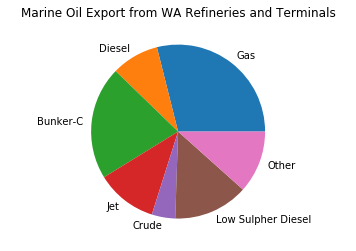

In [53]:
oil_export_values = [gas_export_total, diesel_export_total , bunker_export_total, jet_export_total, crude_export_total, ulsd_export_total, Other_fuel_total]
#colors = ['b', 'g', 'r', 'c', 'm', 'y']
labels = ['Gas', 'Diesel', 'Bunker-C', 'Jet', 'Crude', 'Low Sulpher Diesel', 'Other']
plt.gca().axis("equal")
plt.pie(oil_export_values, labels= labels)
plt.title('Marine Oil Export from WA Refineries and Terminals')